# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Movie Recommendation - EDA and Processing</p>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm

main_color = "#003672"
three_colors_palette = ["#003672", "#943400", "#ED8B75"]
five_colors_palette = ["#003672", "#943400", "#ED8B75", "#F2DC5D", "#0E9594"]
eight_colors_palette = ["#003672", "#943400", "#ED8B75", "#25044B", "#63145B", "#993365", "#C85C6C", "#ED8B75"]

S = "\033[1m" + '\033[96m' # Used for colored strings
E = "\033[0m"

## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Movie DataFrame</p>

In [31]:
movie_df = pd.read_csv("data_p\movies.csv", index_col="movieId")
movie_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [32]:
print(S+"Seems we have a lot of unique values for the genres, we need to do some feature engineering"+E)
movie_df.genres.unique().shape[0] , movie_df.shape[0]

Seems we have a lot of unique values for the genres, we need to do some feature engineering


(951, 9742)

## Working with genres

In [33]:
genres = []
for string in movie_df.genres.unique():
    tmp_genres = string.split("|")
    for genre in tmp_genres:
        if genre not in genres:
            genres.append(genre)

genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [34]:
print(S+"IMAX isn't really a genre, but we'll keep it to see if we get more from it.")
genres.pop() # get rid of "(no genres listed)"

IMAX isn't really a genre, but we'll keep it to see if we get more from it.


'(no genres listed)'

In [35]:
movie_df.isna().sum()

title     0
genres    0
dtype: int64

In [36]:
movie_df = movie_df.reindex(columns=list(movie_df.columns)+genres)
movie_df.head()

,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ids = movie_df.index

for i, string in zip(ids, movie_df.genres):
    tmp_genres = string.split("|")
    for genre in genres:
        if genre  in tmp_genres:
            movie_df.at[i, genre] = 1
        else :
            movie_df.at[i, genre] = 0

movie_df.drop(columns="genres", axis=1, inplace=True)

In [38]:
for genre in genres:
    movie_df[genre] = pd.to_numeric(movie_df[genre], downcast="integer")

movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Working with dates

In [39]:
movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
movie_df["movie_Year"] = movie_df.title.str[-5:-1]
movie_df["title"] = movie_df.title.str[:-7]
movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,movie_Year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,Waiting to Exhale,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
5,Father of the Bride Part II,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [41]:
print(S+"The only things missing are standardization and reducing memory but we'll do it after the EDA"+E)

The only things missing are standardization and reducing memory but we'll do it after the EDA


## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Ratings DataFrame</p>

In [42]:
ratings_df = pd.read_csv("data_p\\ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [43]:
import datetime as dt

timestamps = ratings_df.timestamp
ratings_df.timestamp = ratings_df.timestamp.apply(dt.datetime.fromtimestamp)
ratings_df["year"] = ratings_df.timestamp.dt.strftime("%Y")
ratings_df

,userId,movieId,rating,timestamp,year
0,1,1,4.0,2000-07-30 20:45:03,2000
1,1,3,4.0,2000-07-30 20:20:47,2000
2,1,6,4.0,2000-07-30 20:37:04,2000
3,1,47,5.0,2000-07-30 21:03:35,2000
4,1,50,5.0,2000-07-30 20:48:51,2000
...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 23:53:22,2017
100832,610,168248,5.0,2017-05-04 00:21:31,2017
100833,610,168250,5.0,2017-05-08 21:50:47,2017
100834,610,168252,5.0,2017-05-03 23:19:12,2017


## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA</p>

### Genre count

In [44]:
genre_df = movie_df.drop(columns="movie_Year", axis=1)
genre_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


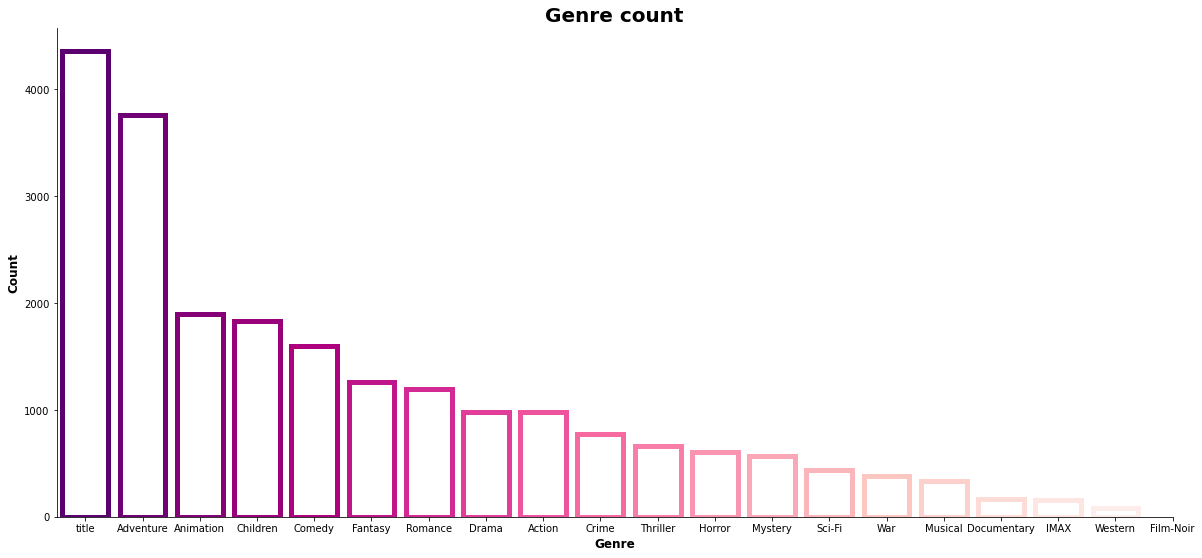

In [45]:
tmp_df = pd.melt(genre_df)[pd.melt(genre_df)["value"]==1]

plt.figure(figsize=(20,9))
sns.countplot(x="variable", hue="value", 
                   data=tmp_df,
                   facecolor=(1, 1, 1, 1),
                   linewidth=5,
                   edgecolor=sns.color_palette("RdPu_r", 19),
                   order = tmp_df['variable'].value_counts().index)

plt.xlabel("Genre", weight="bold", size = 12)
plt.ylabel("Count", weight="bold", size = 12)
plt.legend([],[], frameon=False)
plt.title("Genre count", weight="bold", size= 20)
plt.xticks(list(range(genre_df.shape[1])), genre_df.columns)
sns.despine(right=True, top=True);

del tmp_df

### Genres watched

In [46]:
df_96_to_02 = ratings_df[np.isin(ratings_df.year, list(map(str,list(range(1996,2003)))))].merge(movie_df, on="movieId")
df_03_to_09 = ratings_df[np.isin(ratings_df.year, list(map(str,list(range(2003,2010)))))].merge(movie_df, on="movieId")
df_10_to_16 = ratings_df[np.isin(ratings_df.year, list(map(str,list(range(2010,2017)))))].merge(movie_df, on="movieId")

In [47]:
watched_10_to_16 = {}
watched_03_to_09 = {}
watched_96_to_02 = {}

for genre in genres:
    for df, watched in [(df_10_to_16, watched_10_to_16), (df_03_to_09, watched_03_to_09), (df_96_to_02, watched_96_to_02)]:
        watched[genre] = df[df[genre] == 1].shape[0]


# Turn dicts into df's, sort them and get only the top three
best_10_to_16 = pd.Series(watched_10_to_16.values(), index=watched_10_to_16.keys()).sort_values(ascending=False).iloc[:4]
best_03_to_09 = pd.Series(watched_03_to_09.values(), index=watched_03_to_09.keys()).sort_values(ascending=False).iloc[:4]
best_96_to_02 = pd.Series(watched_96_to_02.values(), index=watched_96_to_02.keys()).sort_values(ascending=False).iloc[:4]

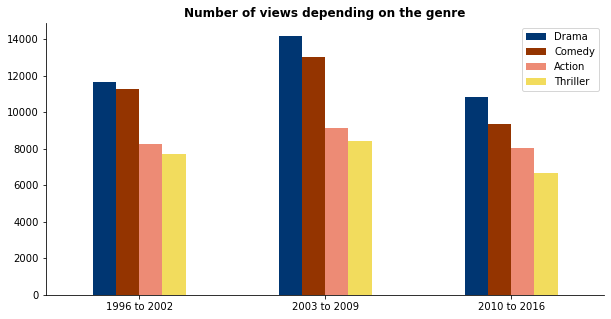

In [48]:
t = pd.concat({"1996 to 2002":best_96_to_02,
            "2003 to 2009":best_03_to_09,
            "2010 to 2016":best_10_to_16}).unstack()

ax = t.plot.bar(color=five_colors_palette, figsize=(10,5), rot=0)
plt.title("Number of views depending on the genre", weight="bold")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

In [49]:
print(S+"Different things can explain the fact the top genres have less view each year, but here we can see movies are generally less watched after 2010 :\n")
print("\t - From 1996 to 2002  : \t",sum(watched_96_to_02.values()))
print("\t - From 2003 to 2009  : \t",sum(watched_03_to_09.values()))
print("\t - From 2010 to 2016  : \t",sum(watched_10_to_16.values()))

Different things can explain the fact the top genres have less view each year, but here we can see movies are generally less watched after 2010 :

	 - From 1996 to 2002  : 	 74035
	 - From 2003 to 2009  : 	 87578
	 - From 2010 to 2016  : 	 71492


## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Feature Engineering</p>

In [50]:
ratings_df.drop(columns="year", inplace=True)

In [51]:
movie_df.movie_Year = pd.to_numeric(movie_df.movie_Year, errors="coerce")
movie_df.dropna(inplace=True) # 2 rows didn't have any Year
movie_df.movie_Year = movie_df.movie_Year.astype('int64')

In [52]:
for id in movie_df.index:
    movie_df.at[id, "mean_rating"] = round(ratings_df[ratings_df.movieId == id].rating.mean(), 2)
    movie_df.at[id, "reviews_count"] = ratings_df[ratings_df.movieId == id].shape[0]
movie_df.reviews_count = movie_df.reviews_count.astype('int64')

In [53]:
ratings_df["review_Year"] = ratings_df.timestamp.dt.strftime("%Y")
ratings_df["review_Month"] = ratings_df.timestamp.dt.strftime("%m")
ratings_df["review_Day"] = ratings_df.timestamp.dt.strftime("%d")
ratings_df["review_week_day"]= ratings_df.timestamp.dt.weekday
ratings_df.drop(columns="timestamp",inplace=True)

In [54]:
movie_df.mean_rating = movie_df.mean_rating.fillna(-1)

In [134]:
data = movie_df.merge(ratings_df, on="movieId")
data

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,mean_rating,reviews_count,overview,image_path,userId,rating,review_Year,review_Month,review_Day,review_week_day
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,3.919922,215.0,"Led by Woody, Andy's toys live happily in his ...",https://image.tmdb.org/t/p/original/uXDfjJbdP4...,1,4.0,2000,07,30,6
1,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,3.919922,215.0,"Led by Woody, Andy's toys live happily in his ...",https://image.tmdb.org/t/p/original/uXDfjJbdP4...,5,4.0,1996,11,08,4
2,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,3.919922,215.0,"Led by Woody, Andy's toys live happily in his ...",https://image.tmdb.org/t/p/original/uXDfjJbdP4...,7,4.5,2005,01,25,1
3,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,3.919922,215.0,"Led by Woody, Andy's toys live happily in his ...",https://image.tmdb.org/t/p/original/uXDfjJbdP4...,15,2.5,2017,11,13,0
4,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,3.919922,215.0,"Led by Woody, Andy's toys live happily in his ...",https://image.tmdb.org/t/p/original/uXDfjJbdP4...,17,4.5,2011,05,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,171495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,318,5.0,2018,01,24,2
100832,171495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,599,4.0,2018,02,20,1
100833,171631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,She's savagely upbeat. Lovably awkward. And fu...,https://image.tmdb.org/t/p/original/i4kcbcvT4X...,111,1.0,2018,02,01,3
100834,171891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"From the director of Generation Iron, comes th...",https://image.tmdb.org/t/p/original/cXZGSRFN2W...,111,3.5,2018,02,01,3


In [56]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        string = S+"Mem. usage decreased from {:.2f} Mb to {:.2f} Mb ({:.1f}% reduction)"+E
        print(
            string.format(
                start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Add summary and image features</p>

In [65]:
links = pd.read_csv("data_p\links.csv").drop(columns="imdbId")
links.tmdbId = links.tmdbId.fillna(-1)
links.tmdbId = links.tmdbId.astype('int64')
links

,movieId,tmdbId
0,1,862
1,2,8844
2,3,15602
3,4,31357
4,5,11862
...,...,...
9737,193581,432131
9738,193583,445030
9739,193585,479308
9740,193587,483455


In [114]:
links.loc[3127]

movieId     4207
tmdbId     12773
Name: 3127, dtype: int64

In [129]:
with open('api.txt') as f:
    api_key = f.readlines()[0]

movie_df["overview"] = np.nan
movie_df["image_path"] = np.nan

for i in tqdm(links.index):
    movie_id = links.loc[i]["movieId"]
    tmdb_id = links.loc[i]["tmdbId"]
    
    url = "https://api.themoviedb.org/3/movie/" + str(tmdb_id) + "?api_key=" + api_key
    resp = requests.get(url)
    if tmdb_id != -1 and resp.status_code == 200:
        resp = resp.json()
        
        overview = resp["overview"]
        
        if resp["poster_path"] is not None :
            image_path = "https://image.tmdb.org/t/p/original" + resp["poster_path"]
        else :
            image_path = np.nan
            
        movie_df.at[movie_id, "overview"] = overview
        movie_df.at[movie_id, "image_path"] = image_path
        
    else:
        movie_df.at[movie_id, "overview"] = np.nan
        movie_df.at[movie_id, "image_path"] = np.nan

100%|██████████| 9742/9742 [21:31<00:00,  7.54it/s]


In [141]:
movie_df.isna().sum()

title             23
Adventure         23
Animation         23
Children          23
Comedy            23
Fantasy           23
Romance           23
Drama             23
Action            23
Crime             23
Thriller          23
Horror            23
Mystery           23
Sci-Fi            23
War               23
Musical           23
Documentary       23
IMAX              23
Western           23
Film-Noir         23
movie_Year        23
mean_rating       23
reviews_count     23
overview         114
image_path       137
dtype: int64

In [145]:
print(S+"23 news rows without any information have been added, let's drop them"+E)
movie_df = movie_df.iloc[:-23 , :]

23 news rows without any information have been added, let's drop them


In [147]:
data.isna().sum()

movieId              0
title               30
Adventure           30
Animation           30
Children            30
Comedy              30
Fantasy             30
Romance             30
Drama               30
Action              30
Crime               30
Thriller            30
Horror              30
Mystery             30
Sci-Fi              30
War                 30
Musical             30
Documentary         30
IMAX                30
Western             30
Film-Noir           30
movie_Year          30
mean_rating         30
reviews_count       30
overview           310
image_path         341
userId               0
rating               0
review_Year          0
review_Month         0
review_Day           0
review_week_day      0
dtype: int64

In [148]:
print(S+"Same thing for this df"+E)
data = data.iloc[:-30 , :]

Same thing for this df


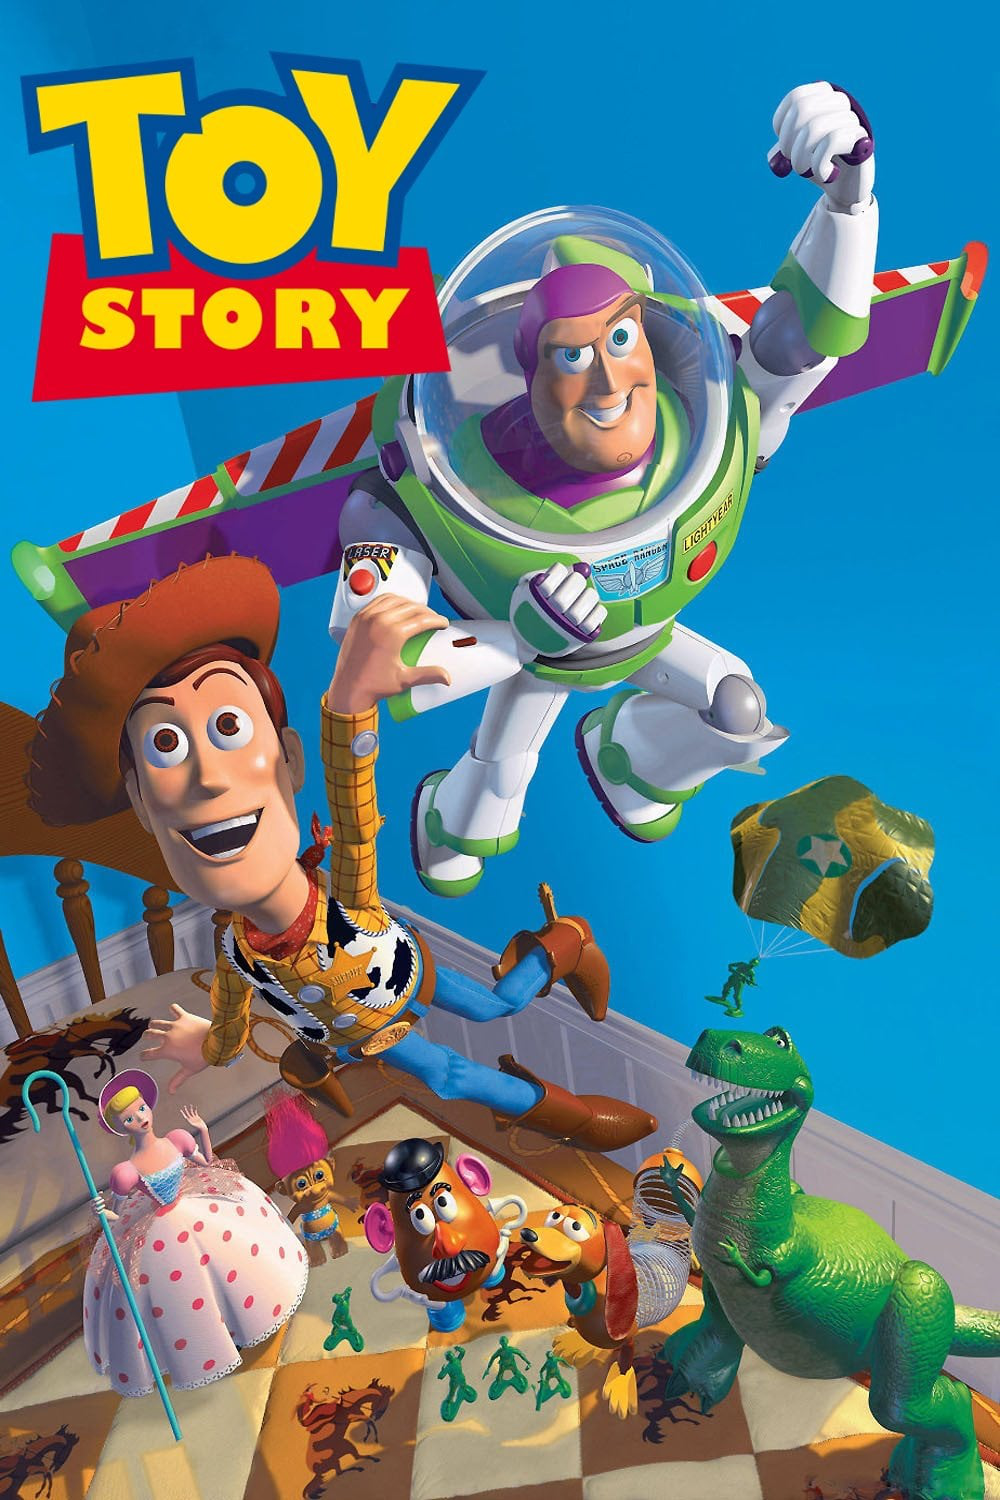

In [73]:
url = "https://image.tmdb.org/t/p/original/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [135]:
data = reduce_memory_usage(data)
movie_df = reduce_memory_usage(movie_df)

Mem. usage decreased from 12.69 Mb to 10.48 Mb (17.4% reduction)
Mem. usage decreased from 0.96 Mb to 0.96 Mb (0.0% reduction)


In [149]:
data.to_csv("data/data.csv")
movie_df.to_csv("data/movie.csv")